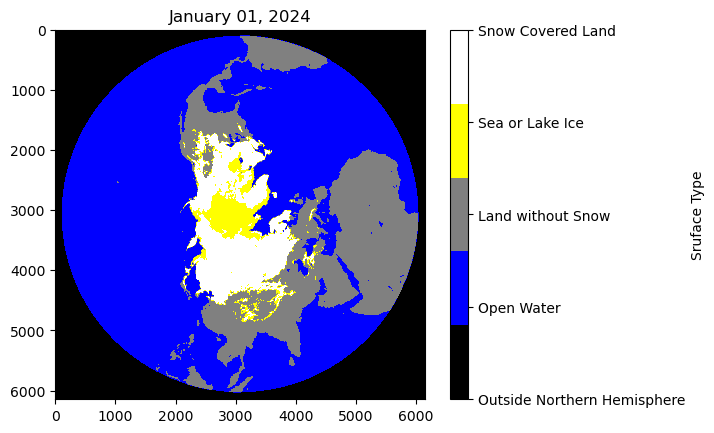

In [41]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from datetime import datetime

# Open the HDF file in read mode
with h5py.File('ims2024001_4km_v1.3.nc', 'r') as file:
    # Set the date
    dataset = file['time']
    timestamp = dataset[0]
    dt_object = datetime.utcfromtimestamp(timestamp)
    formatted_date = dt_object.strftime("%B %d, %Y")
    
    
    # Image array
    dataset = file['IMS_Surface_Values']
    data = dataset[()]

    # Define a custom colormap with five colors
    """
    0 (outside Northern Hemisphere).
    1 (open water)
    2 (land without snow)
    3 (sea or lake ice)
    4 (snow covered land)
    """
    colors = ['black', 'blue', 'gray', 'yellow', 'white']
    cmap = ListedColormap(colors, name='custom_colormap', N=len(colors))

    # Display the image using imshow with the custom colormap
    plt.imshow(data[0], cmap=cmap, vmin=0, vmax=len(colors) - 1)
    plt.title(f'{formatted_date}')
    colorbar = plt.colorbar(ticks=np.arange(len(colors)), label='Sruface Type')
    colorbar.set_ticklabels(['Outside Northern Hemisphere', 'Open Water', 'Land without Snow', 'Sea or Lake Ice', 'Snow Covered Land'])

    plt.show()

In [31]:
np.unique(data[0])

array([0, 1, 2, 3, 4], dtype=int8)